# EDA Bayesian Optimization Results for Heston Dataset


In [1]:
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

In [2]:
# Set seeds
torch.manual_seed(0)
np.random.seed(0)

In [3]:
res_path = '../results/heston_bo_results.csv'

In [4]:
res_df = pd.read_csv(res_path, index_col=0)

In [5]:
res_df.sort_values('mean')

,lr,batch_size,num_layers,hidden_size,act_fn,metric_name,mean,sem,trial_index
arm_name,,,,,,,,,
16_0,0.000641,1344,6,600,ReLU,mse,3.437401e-04,2.794822e-06,16
24_0,0.000147,1100,4,600,LeakyReLU,mse,3.745906e-04,3.508636e-06,24
27_0,0.000156,1126,4,600,LeakyReLU,mse,3.780451e-04,2.990575e-06,27
29_0,0.000172,1144,4,600,LeakyReLU,mse,4.053727e-04,3.809985e-06,29
0_0,0.000795,1422,4,400,ReLU,mse,4.493430e-04,3.323034e-06,0
15_0,0.000181,1845,6,400,ReLU,mse,4.748146e-04,3.699046e-06,15
22_0,0.000125,1134,4,600,LeakyReLU,mse,5.778544e-04,3.050307e-06,22
28_0,0.000160,1137,4,600,LeakyReLU,mse,5.940968e-04,4.642642e-06,28
20_0,0.000083,1167,4,600,LeakyReLU,mse,6.092197e-04,4.620473e-06,20


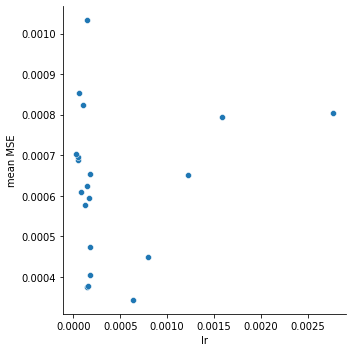

In [6]:
sns.relplot(data=res_df[:20], x="lr", y="mean")

plt.ylabel("mean MSE")
plt.show()

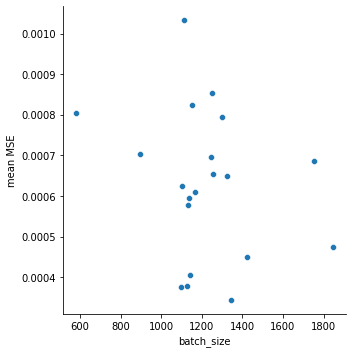

In [7]:
sns.relplot(data=res_df[:20], x="batch_size", y="mean")

plt.ylabel("mean MSE")
plt.show()

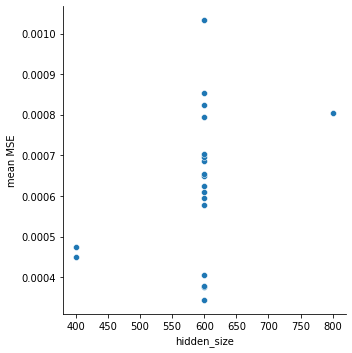

In [8]:
sns.relplot(data=res_df[:20], x='hidden_size', y='mean')

plt.ylabel("mean MSE")
plt.show()

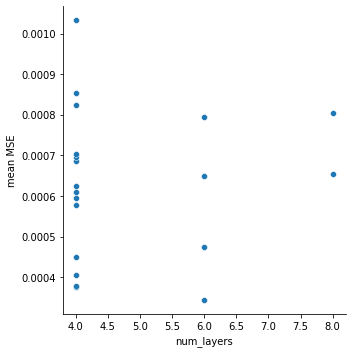

In [9]:
sns.relplot(data=res_df[:20], x='num_layers', y='mean')

plt.ylabel("mean MSE")
plt.show()

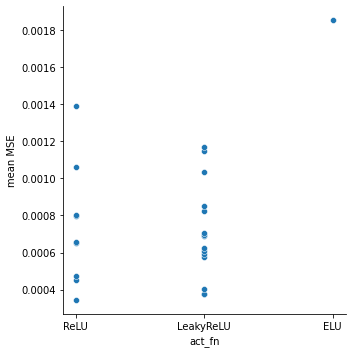

In [10]:
sns.relplot(data=res_df[:25], x='act_fn', y='mean')

plt.ylabel("mean MSE")
plt.savefig('../results/EDA_T_Results_H/af_mean_scatter_h.png')
plt.show()

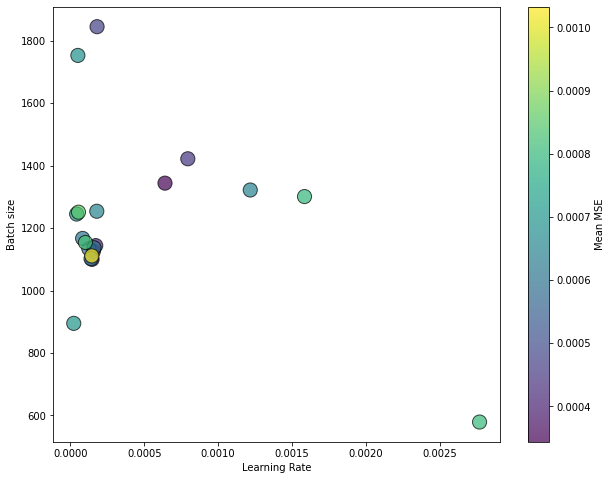

In [11]:
fig, ax = plt.subplots(figsize=(10,8))

sc = ax.scatter(res_df[:20].lr, 
                res_df[:20].batch_size,
                linewidths=1, alpha=.7,
                edgecolor='k',
                s = 200,
                c=res_df[:20]['mean'])
ax.set_ylabel('Batch size')
ax.set_xlabel('Learning Rate')
cbar = fig.colorbar(sc)
cbar.set_label("Mean MSE")

plt.savefig('../results/EDA_T_Results_H/bs_lr_mean_2d_h.png')
plt.show()

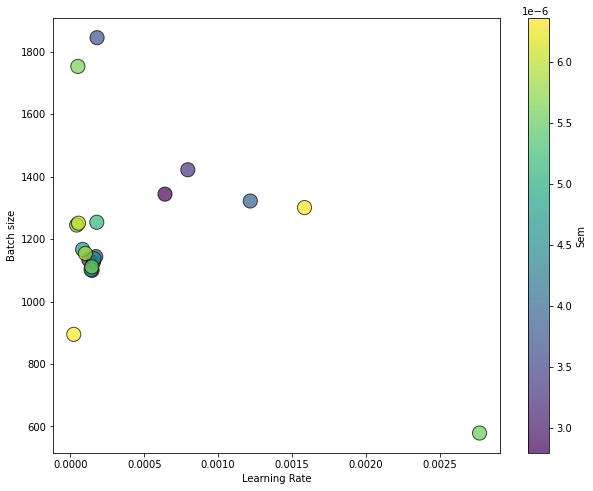

In [12]:
fig, ax = plt.subplots(figsize=(10,8))

sc = ax.scatter(res_df[:20].lr, res_df[:20].batch_size,
            linewidths=1, alpha=.7,
            edgecolor='k',
            s = 200,
            c=res_df[:20]['sem'])
ax.set_ylabel('Batch size')
ax.set_xlabel('Learning Rate')
cbar = fig.colorbar(sc)
cbar.set_label("Sem")

plt.savefig('../results/EDA_T_Results_H/bs_lr_sem_2d_h.png')
plt.show()

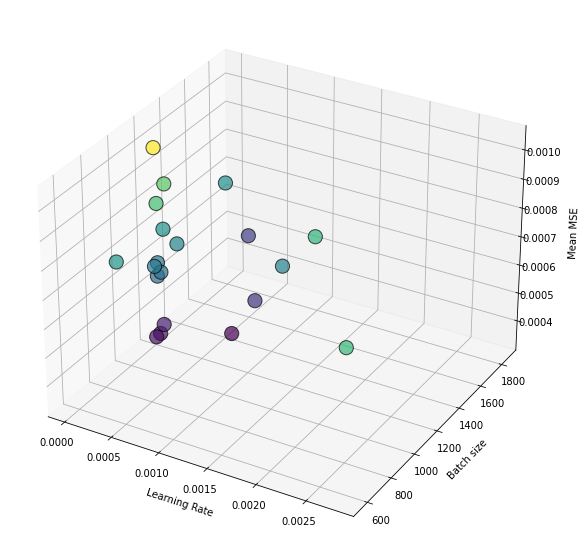

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(res_df[:20].lr, 
           res_df[:20].batch_size, 
           res_df[:20]['mean'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=res_df[:20]['mean'])
ax.set_ylabel('Batch size', labelpad=6.0)
ax.set_xlabel('Learning Rate', labelpad=6.0)
ax.set_zlabel('Mean MSE', labelpad=12.0)

plt.savefig('../results/EDA_T_Results_H/bs_lr_mean_3d_h.png', dpi=300)
plt.show()

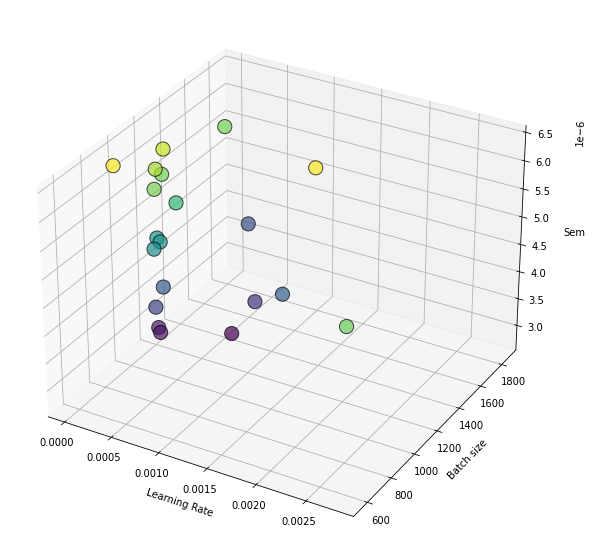

In [14]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(res_df[:20].lr, 
           res_df[:20].batch_size, 
           res_df[:20]['sem'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=res_df[:20]['sem'])
ax.set_ylabel('Batch size', labelpad=6.0)
ax.set_xlabel('Learning Rate', labelpad=6.0)
ax.set_zlabel('Sem', labelpad=12.0)

plt.savefig('../results/EDA_T_Results_H/bs_lr_sem_3d_h.png', dpi=300)
plt.show()

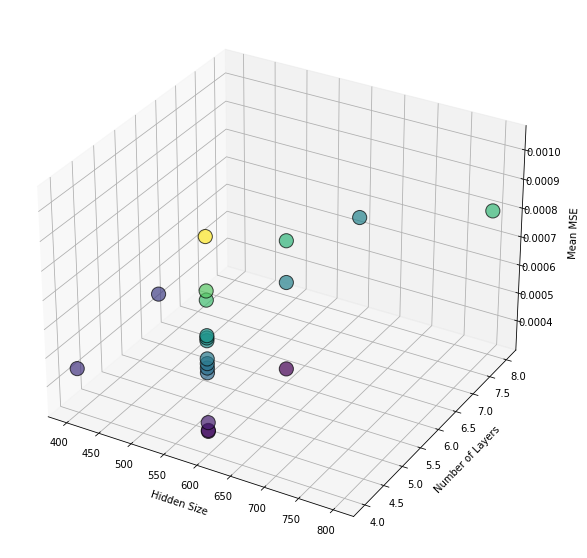

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(res_df[:20].hidden_size, 
           res_df[:20].num_layers, 
           res_df[:20]['mean'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=res_df[:20]['mean'])
ax.set_ylabel('Number of Layers', labelpad=6.0)
ax.set_xlabel('Hidden Size', labelpad=6.0)
ax.set_zlabel('Mean MSE', labelpad=12.0)

plt.savefig('../results/EDA_T_Results_H/hd_nl_mean_3d_h.png', dpi=300)
plt.show()

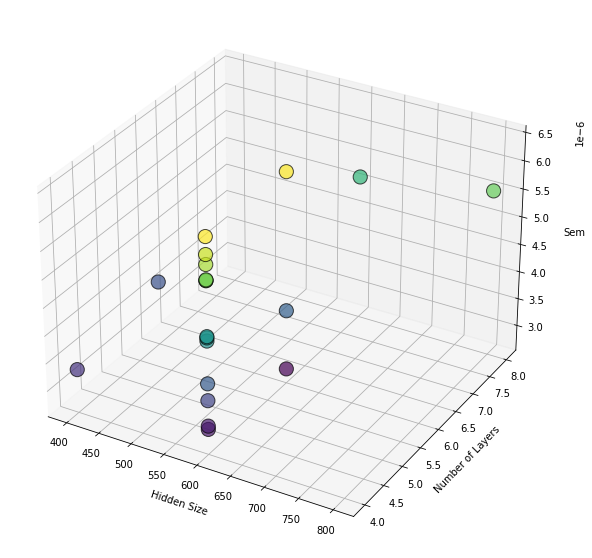

In [16]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(res_df[:20].hidden_size, 
           res_df[:20].num_layers, 
           res_df[:20]['sem'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=res_df[:20]['sem'])
ax.set_ylabel('Number of Layers', labelpad=6.0)
ax.set_xlabel('Hidden Size', labelpad=6.0)
ax.set_zlabel('Sem', labelpad=12.0)

plt.savefig('../results/EDA_T_Results_H/hd_nl_sem_3d_h.png', dpi=300)
plt.show()

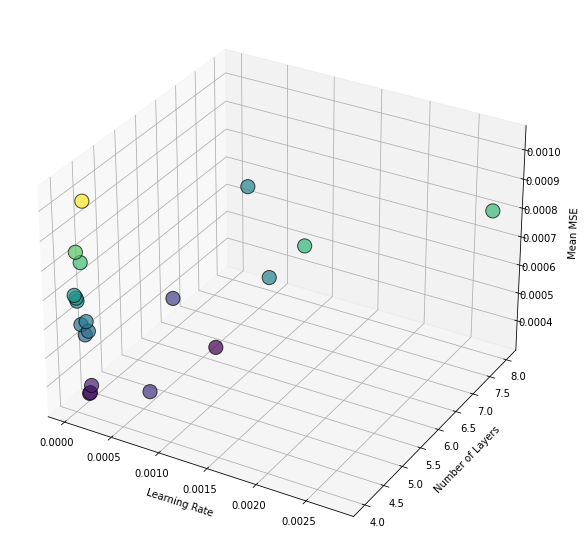

In [17]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(res_df[:20].lr, 
           res_df[:20].num_layers, 
           res_df[:20]['mean'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=res_df[:20]['mean'])
ax.set_ylabel('Number of Layers', labelpad=6.0)
ax.set_xlabel('Learning Rate', labelpad=6.0)
ax.set_zlabel('Mean MSE', labelpad=12.0)

plt.savefig('../results/EDA_T_Results_H/lr_nl_mean_3d_h.png', dpi=300)
plt.show()

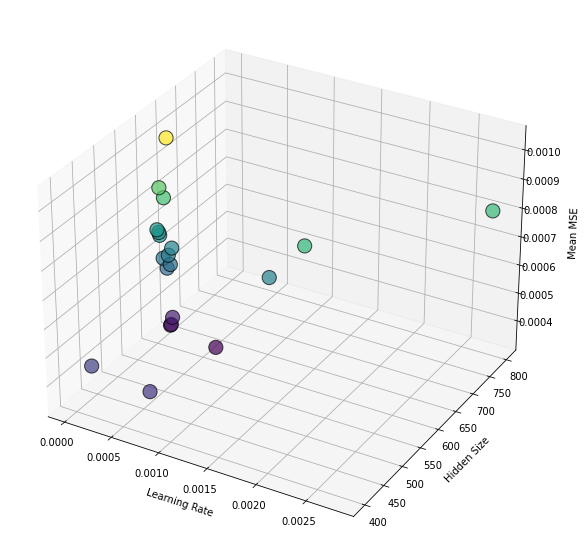

In [18]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(res_df[:20].lr, 
           res_df[:20].hidden_size, 
           res_df[:20]['mean'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=res_df[:20]['mean'])
ax.set_ylabel('Hidden Size', labelpad=6.0)
ax.set_xlabel('Learning Rate', labelpad=6.0)
ax.set_zlabel('Mean MSE', labelpad=12.0)

plt.savefig('../results/EDA_T_Results_H/lr_hd_mean_3d_h.png', dpi=300)
plt.show()

- [SO Question](https://stackoverflow.com/questions/59232073/scatter-plot-with-3-variables-in-matplotlib)